In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import stats
from numpy import genfromtxt
from scipy.integrate import quad
import matplotlib.ticker as mtick
import scipy
import pickle
import seaborn as sns

from matplotlib import cm
from scipy.optimize import differential_evolution

datPath = 'data/in/'

## The approximation :: Note, doesn't have a beta term!!

In [5]:
mu = 5e-5
gam=0.33

lg_kappa_vec = np.linspace(-9,-6,20)
lg_N_vec = (mu+gam+np.exp(lg_kappa_vec))*np.exp(-0.5772) - lg_kappa_vec

## Using Digamma functions

In [14]:
def deriv_PDF_atzero_eqzero(lnN,mu,gam,beta,log10_kappa):
    return(np.abs(np.log( np.exp(lnN) ) + scipy.special.digamma(np.exp(lnN)*(10**log10_kappa)/beta) - scipy.special.digamma((mu+gam+(10**log10_kappa))*np.exp(lnN)/beta) - scipy.special.digamma(1)))
def deriv_PDF_atzero_eqone(lnN,mu,gam,beta,log10_kappa):
    return(np.abs(np.log( np.exp(lnN) ) + scipy.special.digamma(np.exp(lnN)*(10**log10_kappa)/beta) - scipy.special.digamma((mu+gam+(10**log10_kappa))*np.exp(lnN)/beta) - scipy.special.digamma(1) - 1))

my_mu = 1e-5 
my_gam = 0.33
my_beta = 0.1

len_out = 10
log10_kappa_vec = np.linspace(-9,-6,len_out)
# Initialize results vector
res_vec_zero = np.zeros([len_out,2])
for i in range(len(log10_kappa_vec)):
    log10_kappa_in = log10_kappa_vec[i]
    def f(x):
        return( deriv_PDF_atzero_eqzero(x,my_mu,my_gam,my_beta,log10_kappa_in) )
    bounds = [(0,20)]
    res = differential_evolution(f, bounds)
    res_vec_zero[i,0] = log10_kappa_in
    res_vec_zero[i,1] = np.log10(np.exp(res.x[0]))
#     print(res.fun) # Visual check that we are getting approximately zero [good]


res_vec_one = np.zeros([len_out,2])
for i in range(len(log10_kappa_vec)):
    log10_kappa_in = log10_kappa_vec[i]
    def f(x):
        return( deriv_PDF_atzero_eqone(x,my_mu,my_gam,my_beta,log10_kappa_in) )
    bounds = [(0,20)]
    res = differential_evolution(f, bounds)
    res_vec_one[i,0] = log10_kappa_in
    res_vec_one[i,1] = np.log10(np.exp(res.x[0]))
#     print(res.fun)
    
    
#

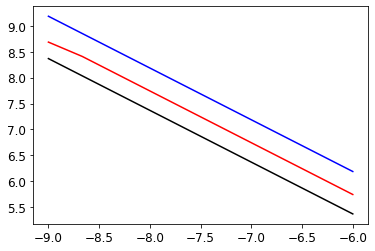

In [15]:
mu = 5e-5
gam=0.33

lg_kappa_vec = np.linspace(-9,-6,20)
lg_N_vec = (mu+gam+np.exp(lg_kappa_vec))*np.exp(-0.5772) - lg_kappa_vec


fig = plt.figure()
ax = fig.add_subplot(111)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(lg_kappa_vec,lg_N_vec,color='b')
plt.plot(res_vec_zero[:,0],res_vec_zero[:,1],color='k')
plt.plot(res_vec_one[:,0],res_vec_one[:,1],color='r')